# Recap of Pandas

The following tutorial contains examples of using the pandas library module. It is by no means exhaustive, but should hopefully recap many of the key features pandas offers. This notebook is based upon several of the resources found in the reading list, including _Introduction to Data Mining_ by Tan, Steinbach, Karpatne and Kumar, McKinney's _Python for Data Analysis_ and VanderPlas' _Python Data Science Handbook_. To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

As ever, you are encouraged to experiment with this code. Alter it, make mistakes, pursue your natural questions and create python scripts in Spyder based upon the code found in this notebook. In doing so, you will gain a much greater appreciation for how pandas works.

## 3.1 Introduction to Pandas

The pandas library is a newer package built on top of NumPy. It provides an efficient implementation of a `DataFrame` which is essentially a multidimensional array with attached row and column labels, often with heterogeneous types and/or missing data. In addition to offering a convenient storage interface for labelled data, pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programmes.

In order to justify the exploration of pandas, it is perhaps worth discussing limitations of NumPy. As we have seen, the `ndarray` data structure provides essential features for the type of clean, well-organised data typically seen in numerical computing tasks. However, when we need more flexibility (e.g. attaching labels to data, working with missing data, and so on) or wish to perform operations that do not map well to element-wise broadcasting (e.g. groupings, pivots etc.), then the cracks begin to show in NumPy. For this, we have pandas (and, in particular, its `Series` and `DataFrame` objects) which provides efficient access to these sorts of 'data munging' tasks that occupy much of a data scientist's time.

__Basic viewpoint:__ pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.

### 3.1.1 Series

A Series object consists of a one-dimensional array of values, whose elements can be referenced using an index array. A Series object can be created from a list, a numpy array, or a Python dictionary. You can apply most of the numpy functions on the Series object.

In [1]:
from pandas import Series

s = Series([3.1, 2.4, -1.7, 0.2, -2.9, 4.5])   # creating a series from a list
print('Series, s =\n', s, '\n')

print('s.values =', s.values)     # display values of the Series
print('s.index =', s.index)       # display indices of the Series
print('s.dtype =', s.dtype)       # display the element type of the Series

Series, s =
 0    3.1
1    2.4
2   -1.7
3    0.2
4   -2.9
5    4.5
dtype: float64 

s.values = [ 3.1  2.4 -1.7  0.2 -2.9  4.5]
s.index = RangeIndex(start=0, stop=6, step=1)
s.dtype = float64


In [2]:
import numpy as np

s2 = Series(np.random.randn(6))   # creating a series from a numpy ndarray
print('Series s2 =\n', s2, '\n')
print('s2.values =', s2.values)   # display values of the Series
print('s2.index =', s2.index)     # display indices of the Series
print('s2.dtype =', s2.dtype)     # display the element type of the Series

Series s2 =
 0   -0.998531
1    0.514860
2   -0.852668
3    0.626151
4    0.376648
5   -0.753096
dtype: float64 

s2.values = [-0.99853064  0.51486041 -0.85266814  0.62615052  0.37664796 -0.75309604]
s2.index = RangeIndex(start=0, stop=6, step=1)
s2.dtype = float64


The essential difference between a one-dimensional NumPy array and a `Series` obect is that while the NumPy array has an _implicitly defined_ integer index used to access the values, the pandas `Series` has an _explicitly defined_ index associated with the values. This explicit index gives the `Series` object additional capabilities. So, for example, we can use strings as an index (as opposed to simply an integer).

In [3]:
s3 = Series([1.2,2.5,-2.2,3.1,-0.8,-3.2], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6',])
print('Series s3 =\n', s3, '\n')
print('s3.values =', s3.values)   # display values of the Series
print('s3.index =', s3.index)     # display indices of the Series
print('s3.dtype =', s3.dtype)     # display the element type of the Series

print('Jan 4 entry is ', s3['Jan 4'])       # display the element corresponding to Jan 4 index

Series s3 =
 Jan 1    1.2
Jan 2    2.5
Jan 3   -2.2
Jan 4    3.1
Jan 5   -0.8
Jan 6   -3.2
dtype: float64 

s3.values = [ 1.2  2.5 -2.2  3.1 -0.8 -3.2]
s3.index = Index(['Jan 1', 'Jan 2', 'Jan 3', 'Jan 4', 'Jan 5', 'Jan 6'], dtype='object')
s3.dtype = float64
Jan 4 entry is  3.1


We can think of a pandas `Series` as a specialisation of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure that maps typed keys to a set of types values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a pandas `Series` makes it more efficient than Python dictionaries for certain operations.

We can solidify this viewpoint of a `Series`-as-dictionary by constructing a `Series` object directly from a Python dictionary.

In [4]:
universities = {'UCL': 43900, 'Imperial': 18399, 'KCL': 29600, 'Queen Mary': 32000, 'UH': 30000}

s4 = Series(universities)   # creating a series from dictionary object
print('Series s4 =\n', s4, '\n')
print('s4.values =', s4.values)   # display values of the Series
print('s4.index=', s4.index)      # display indices of the Series
print('s4.dtype =', s4.dtype)     # display the element type of the Series

Series s4 =
 UCL           43900
Imperial      18399
KCL           29600
Queen Mary    32000
UH            30000
dtype: int64 

s4.values = [43900 18399 29600 32000 30000]
s4.index= Index(['UCL', 'Imperial', 'KCL', 'Queen Mary', 'UH'], dtype='object')
s4.dtype = int64


In [5]:
s3 = Series([1.2,2.5,-2.2,3.1,-0.8,-3.2], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6',])
print('s3 =\n', s3, '\n')

# Accessing elements of a Series

print('s3[2]=', s3[2])        # display third element of the Series
print('s3[\'Jan 3\']=', s3['Jan 3'])   # indexing element of a Series 

print('\ns3[1:3]=')             # display a slice of the Series
print(s3[1:3])
print('\ns3.iloc([1:3])=')      # display a slice of the Series
print(s3.iloc[1:3])

s3 =
 Jan 1    1.2
Jan 2    2.5
Jan 3   -2.2
Jan 4    3.1
Jan 5   -0.8
Jan 6   -3.2
dtype: float64 

s3[2]= -2.2
s3['Jan 3']= -2.2

s3[1:3]=
Jan 2    2.5
Jan 3   -2.2
dtype: float64

s3.iloc([1:3])=
Jan 2    2.5
Jan 3   -2.2
dtype: float64


__Problem:__ Create a `Series` of the five most populous UK cities. Print the second largest city's population.

There are various functions available to find the number of elements in a Series. The result of the function depends on whether null elements are included. 

In [7]:
s3['Jan 7'] = np.nan
print('Series s3 =\n', s3, '\n')

print('Shape of s3 =', s3.shape)   # get the dimension of the Series
print('Size of s3 =', s3.size)     # get the number of elements of the Series
print('Count of s3 =', s3.count()) # get the number of non-null elements of the Series

Series s3 =
 Jan 1    1.2
Jan 2    2.5
Jan 3   -2.2
Jan 4    3.1
Jan 5   -0.8
Jan 6   -3.2
Jan 7    NaN
dtype: float64 

Shape of s3 = (7,)
Size of s3 = 7
Count of s3 = 6


A boolean filter can be used to select elements of a Series:

In [8]:
import pandas as pd

print(s3[s3 > 0])   # applying filter to select non-negative elements of the Series

print('\n', pd.isnull(s4))        # isnull detects missing data
s4['Reading'] = np.nan
print('\n', pd.notnull(s4))

Jan 1    1.2
Jan 2    2.5
Jan 4    3.1
dtype: float64

 UCL           False
Imperial      False
KCL           False
Queen Mary    False
UH            False
dtype: bool

 UCL            True
Imperial       True
KCL            True
Queen Mary     True
UH             True
Reading       False
dtype: bool


Scalar operations can be performed on elements of a numeric Series

In [9]:
print('s3 + 4 =\n', s3 + 4, '\n')       
print('s3 / 4 =\n', s3 / 4)                 

s3 + 4 =
 Jan 1    5.2
Jan 2    6.5
Jan 3    1.8
Jan 4    7.1
Jan 5    3.2
Jan 6    0.8
Jan 7    NaN
dtype: float64 

s3 / 4 =
 Jan 1    0.300
Jan 2    0.625
Jan 3   -0.550
Jan 4    0.775
Jan 5   -0.200
Jan 6   -0.800
Jan 7      NaN
dtype: float64


NumPy functions can also be applied to pandas `Series`. 

In [10]:
print('np.log(s3 + 4) =\n', np.log(s3 + 4), '\n')    # applying log function to a numeric Series
print('np.exp(s3 - 4) =\n', np.exp(s3 - 4), '\n')    # applying exponent function to a numeric Series

np.log(s3 + 4) =
 Jan 1    1.648659
Jan 2    1.871802
Jan 3    0.587787
Jan 4    1.960095
Jan 5    1.163151
Jan 6   -0.223144
Jan 7         NaN
dtype: float64 

np.exp(s3 - 4) =
 Jan 1    0.060810
Jan 2    0.223130
Jan 3    0.002029
Jan 4    0.406570
Jan 5    0.008230
Jan 6    0.000747
Jan 7         NaN
dtype: float64 



The `value_counts()` function can be used for tabulating the counts of each discrete value in the Series. 

In [11]:
colors = Series(['red', 'blue', 'blue', 'yellow', 'red', 'green', 'blue', np.nan])
print('colors =\n', colors, '\n')

print('colors.value_counts() =\n', colors.value_counts())

colors =
 0       red
1      blue
2      blue
3    yellow
4       red
5     green
6      blue
7       NaN
dtype: object 

colors.value_counts() =
 blue      3
red       2
yellow    1
green     1
dtype: int64


### 3.1.2 DataFrame

A `DataFrame` object is a tabular, spreadsheet-like data structure containing a collection of columns, each of which can be of different types (numeric, string, boolean, etc). Unlike `Series`, a `DataFrame` has distinct row and column indices. There are many ways to create a `DataFrame` object (e.g. from a dictionary, list of tuples, or even NumPy's ndarrays).

If a `Series` is an analog of a one-dimensional array with explicit indices, a `DataFrame`is an analog of a two-dimensional array with explicit row and column indices. Just as we might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, we can think of a `DataFrame` as a sequence of aligned `Series` objects. Here, by 'aligned' we mean that they share the same index.

In [12]:
from pandas import DataFrame

universities = {'university': ['UCL', 'UCL', 'UCL', 'Imperial', 'Imperial','Imperial'],
       'year': ['2018', '2019', '2020','2018','2019','2020'],
       'pop': [41539,42106,43836,17054,17568,18264]}          
uniData = DataFrame(universities)            # creating DataFrame from dictionary
uniData                              # display the table

,university,year,pop
0,UCL,2018,41539
1,UCL,2019,42106
2,UCL,2020,43836
3,Imperial,2018,17054
4,Imperial,2019,17568
5,Imperial,2020,18264


In [13]:
print('uniData.index =', uniData.index)         # print the row indices
print('uniData.columns =', uniData.columns)     # print the column indices

uniData.index = RangeIndex(start=0, stop=6, step=1)
uniData.columns = Index(['university', 'year', 'pop'], dtype='object')


We can also insert columns to an existing `DataFrame`.

In [14]:
uniData2 = DataFrame(universities, index = [1,2,3,4,5,6])  # change the row index
uniData2['fees'] = 9250    # add column with same value
uniData2['debt'] = np.nan
uniData2                   # display table

,university,year,pop,fees,debt
1,UCL,2018,41539,9250,NaN
2,UCL,2019,42106,9250,NaN
3,UCL,2020,43836,9250,NaN
4,Imperial,2018,17054,9250,NaN
5,Imperial,2019,17568,9250,NaN
6,Imperial,2020,18264,9250,NaN


We can also think of a `DataFrame` as a specialization of a dictionary. Where a dictionary maps a key to a value, a `DataFrame` maps a column name to a `Series` of column data. For example, asking for the 'pop' attribute returns the `Series` object containing the populations we saw earlier:

In [15]:
uniData2['pop']

1    41539
2    42106
3    43836
4    17054
5    17568
6    18264
Name: pop, dtype: int64

There are several ways we can construct a `DataFrame`. For example, we can use a list of tuples.

In [16]:
tuplelist = [(2011,45.1,32.4),(2012,42.4,34.5),(2013,47.2,39.2),
              (2014,44.2,31.4),(2015,39.9,29.8),(2016,41.5,36.7)]
columnNames = ['year','temp','precip']
weatherData = DataFrame(tuplelist, columns=columnNames)
weatherData

,year,temp,precip
0,2011,45.1,32.4
1,2012,42.4,34.5
2,2013,47.2,39.2
3,2014,44.2,31.4
4,2015,39.9,29.8
5,2016,41.5,36.7


We can create a `DataFrame` from a NumPy `ndarray`.

In [17]:
import numpy as np

npdata = np.random.randn(5,3)  # create a 5 by 3 random matrix
columnNames = ['x1','x2','x3']
data = DataFrame(npdata, columns=columnNames)
data

,x1,x2,x3
0,-1.005463,-0.770804,0.294280
1,-2.268767,-0.250565,0.691772
2,-0.597849,0.375154,-0.743485
3,-1.053327,0.385379,1.696020
4,1.113981,0.028582,-1.129064


There are many ways to access elements of a DataFrame object.

In [18]:
# accessing an entire column will return a Series object

print(data['x2'])
print(type(data['x2']))

0   -0.770804
1   -0.250565
2    0.375154
3    0.385379
4    0.028582
Name: x2, dtype: float64
<class 'pandas.core.series.Series'>


In [19]:
# accessing an entire row will return a Series object

print('Row 3 of data table:')
print(data.iloc[2])       # returns the 3rd row of DataFrame
print(type(data.iloc[2]))

print('\nRow 3 of uni data table:')
print(uniData2.iloc[2])   # row contains objects of different types

Row 3 of data table:
x1   -0.597849
x2    0.375154
x3   -0.743485
Name: 2, dtype: float64
<class 'pandas.core.series.Series'>

Row 3 of uni data table:
university      UCL
year           2020
pop           43836
fees           9250
debt            NaN
Name: 3, dtype: object


In [20]:
# accessing a specific element of the DataFrame

print('uniData2 =\n', uniData2)

print('\nuniData2.iloc[1,2] =', uniData2.iloc[1,2])                # retrieving second row, third column
print('uniData2.loc[1,\'year\'] =', uniData2.loc[1,'year'])    # retrieving second row, column named 'model'

# accessing a slice of the DataFrame

print('\nuniData2.iloc[1:3,1:3]=')
print(uniData2.iloc[1:3,1:3])

uniData2 =
   university  year    pop  fees  debt
1        UCL  2018  41539  9250   NaN
2        UCL  2019  42106  9250   NaN
3        UCL  2020  43836  9250   NaN
4   Imperial  2018  17054  9250   NaN
5   Imperial  2019  17568  9250   NaN
6   Imperial  2020  18264  9250   NaN

uniData2.iloc[1,2] = 42106
uniData2.loc[1,'year'] = 2018

uniData2.iloc[1:3,1:3]=
   year    pop
2  2019  42106
3  2020  43836


In [21]:
print('uniData2 =\n', uniData2, '\n')

print('uniData2.shape =', uniData2.shape)
print('uniData2.size =', uniData2.size)

uniData2 =
   university  year    pop  fees  debt
1        UCL  2018  41539  9250   NaN
2        UCL  2019  42106  9250   NaN
3        UCL  2020  43836  9250   NaN
4   Imperial  2018  17054  9250   NaN
5   Imperial  2019  17568  9250   NaN
6   Imperial  2020  18264  9250   NaN 

uniData2.shape = (6, 5)
uniData2.size = 30


In [22]:
# selection and filtering

print('uniData2 =\n', uniData2, '\n')

print('uniData2[uniData2.pop > 25000] =')  
print(uniData2[uniData2['pop'] > 25000])

uniData2 =
   university  year    pop  fees  debt
1        UCL  2018  41539  9250   NaN
2        UCL  2019  42106  9250   NaN
3        UCL  2020  43836  9250   NaN
4   Imperial  2018  17054  9250   NaN
5   Imperial  2019  17568  9250   NaN
6   Imperial  2020  18264  9250   NaN 

uniData2[uniData2.pop > 25000] =
  university  year    pop  fees  debt
1        UCL  2018  41539  9250   NaN
2        UCL  2019  42106  9250   NaN
3        UCL  2020  43836  9250   NaN


In [23]:
del uniData2['debt']

print(uniData2)

  university  year    pop  fees
1        UCL  2018  41539  9250
2        UCL  2019  42106  9250
3        UCL  2020  43836  9250
4   Imperial  2018  17054  9250
5   Imperial  2019  17568  9250
6   Imperial  2020  18264  9250


### 3.1.3 Arithmetic Operations

One of the strengths of NumPy is that it allows us to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more complicated operations (trigonometric functions, exponential and logarithmic functions, etc.). Pandas inherits much of this functionality from NumPy, and the ufuncs we discussed in the last lab are key to this.

Pandas includes a couple of useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output, and for binary operations such as addition and multiplication, pandas will
automatically align indices when passing the objects to the ufunc. This means that keeping the context of data and combining data from different sources—both potentially error-prone tasks with raw NumPy arrays—become essentially foolproof with
pandas. We will additionally see that there are well-defined operations between onedimensional `Series` structures and two-dimensional `DataFrame` structures.

In [24]:
print(data)

print('\nData transpose operation: data.T')
print(data.T)    # transpose operation

print('\nAddition: data + 4')
print(data + 4)    # addition operation

print('\nMultiplication: data * 10')
print(data * 10)   # multiplication operation

         x1        x2        x3
0 -1.005463 -0.770804  0.294280
1 -2.268767 -0.250565  0.691772
2 -0.597849  0.375154 -0.743485
3 -1.053327  0.385379  1.696020
4  1.113981  0.028582 -1.129064

Data transpose operation: data.T
           0         1         2         3         4
x1 -1.005463 -2.268767 -0.597849 -1.053327  1.113981
x2 -0.770804 -0.250565  0.375154  0.385379  0.028582
x3  0.294280  0.691772 -0.743485  1.696020 -1.129064

Addition: data + 4
         x1        x2        x3
0  2.994537  3.229196  4.294280
1  1.731233  3.749435  4.691772
2  3.402151  4.375154  3.256515
3  2.946673  4.385379  5.696020
4  5.113981  4.028582  2.870936

Multiplication: data * 10
          x1        x2         x3
0 -10.054627 -7.708038   2.942804
1 -22.687672 -2.505647   6.917715
2  -5.978488  3.751543  -7.434852
3 -10.533274  3.853795  16.960196
4  11.139806  0.285820 -11.290644


In [25]:
print('data =\n', data)

columnNames = ['x1','x2','x3']
data2 = DataFrame(np.random.randn(5,3), columns=columnNames)
print('\ndata2 =')
print(data2)

print('\ndata + data2 = ')
print(data.add(data2))

print('\ndata * data2 = ')
print(data.mul(data2))

data =
          x1        x2        x3
0 -1.005463 -0.770804  0.294280
1 -2.268767 -0.250565  0.691772
2 -0.597849  0.375154 -0.743485
3 -1.053327  0.385379  1.696020
4  1.113981  0.028582 -1.129064

data2 =
         x1        x2        x3
0 -1.343278  0.982917  0.713993
1  0.208519  0.550566  1.330987
2 -1.023700  0.789314  1.633565
3 -0.557926 -0.064272  0.568061
4  1.103820 -0.677179 -0.170731

data + data2 = 
         x1        x2        x3
0 -2.348741  0.212113  1.008274
1 -2.060249  0.300001  2.022758
2 -1.621549  1.164468  0.890080
3 -1.611253  0.321107  2.264081
4  2.217800 -0.648596 -1.299795

data * data2 = 
         x1        x2        x3
0  1.350616 -0.757636  0.210114
1 -0.473080 -0.137952  0.920739
2  0.612018  0.296114 -1.214532
3  0.587678 -0.024769  0.963443
4  1.229634 -0.019355  0.192766


In [26]:
print(data.abs())    # get the absolute value for each element

print('\nMaximum value per column:')
print(data.max())    # get maximum value for each column

print('\nMinimum value per row:')
print(data.min(axis=1))    # get minimum value for each row

print('\nSum of values per column:')
print(data.sum())    # get sum of values for each column

print('\nAverage value per row:')
print(data.mean(axis=1))    # get average value for each row

print('\nCalculate max - min per column')
f = lambda x: x.max() - x.min()
print(data.apply(f))

print('\nCalculate max - min per row')
f = lambda x: x.max() - x.min()
print(data.apply(f, axis=1))

         x1        x2        x3
0  1.005463  0.770804  0.294280
1  2.268767  0.250565  0.691772
2  0.597849  0.375154  0.743485
3  1.053327  0.385379  1.696020
4  1.113981  0.028582  1.129064

Maximum value per column:
x1    1.113981
x2    0.385379
x3    1.696020
dtype: float64

Minimum value per row:
0   -1.005463
1   -2.268767
2   -0.743485
3   -1.053327
4   -1.129064
dtype: float64

Sum of values per column:
x1   -3.811425
x2   -0.232253
x3    0.809522
dtype: float64

Average value per row:
0   -0.493995
1   -0.609187
2   -0.322060
3    0.342691
4    0.004499
dtype: float64

Calculate max - min per column
x1    3.382748
x2    1.156183
x3    2.825084
dtype: float64

Calculate max - min per row
0    1.299743
1    2.960539
2    1.118639
3    2.749347
4    2.243045
dtype: float64


The `value_counts()` function can also be applied to a pandas DataFrame

In [27]:
objects = {'shape': ['circle', 'square', 'square', 'square', 'circle', 'rectangle'],
           'color': ['red', 'red', 'red', 'blue', 'blue', 'blue']}

shapeData = DataFrame(objects)
print('shapeData =\n', shapeData, '\n')

print('shapeData.value_counts() =\n', shapeData.value_counts().sort_values())

shapeData =
        shape color
0     circle   red
1     square   red
2     square   red
3     square  blue
4     circle  blue
5  rectangle  blue 

shapeData.value_counts() =
 shape      color
circle     blue     1
           red      1
rectangle  blue     1
square     blue     1
           red      2
dtype: int64


__Problem:__ Create a `Series` and `DataFrame` with integer values (and the `DataFrame` with columns labelled 'A', 'B', 'C' and 'D'). Then apply two NumPy ufuncs on either of these objects and observe the the result is another pandas object _with the indices preserved_.

### 3.1.4 Plotting Series and DataFrame

There are many built-in functions available to plot the data stored in a `Series` or a `DataFrame`.

**(a)** Line plot

<AxesSubplot:title={'center':'Line plot'}>

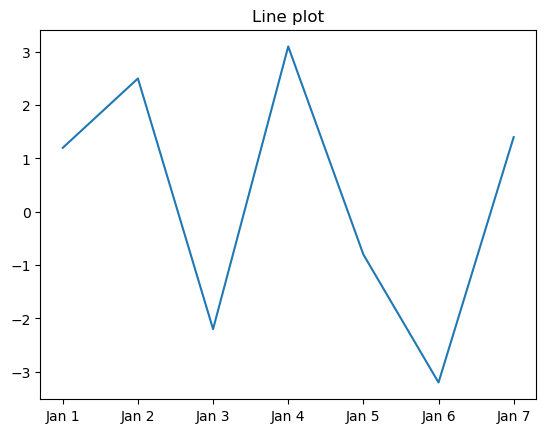

In [32]:
%matplotlib inline

s3 = Series([1.2,2.5,-2.2,3.1,-0.8,-3.2,1.4], 
            index = ['Jan 1','Jan 2','Jan 3','Jan 4','Jan 5','Jan 6','Jan 7'])
s3.plot(kind='line', title='Line plot')

**(b)** Bar plot

<AxesSubplot:title={'center':'Bar plot'}>

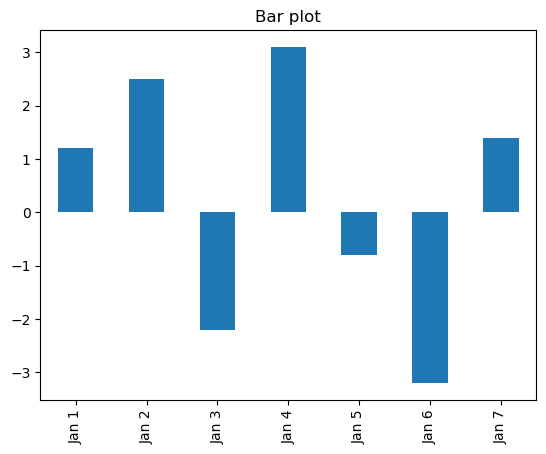

In [33]:
s3.plot(kind='bar', title='Bar plot')

**(c)** Histogram

<AxesSubplot:title={'center':'Histogram'}, ylabel='Frequency'>

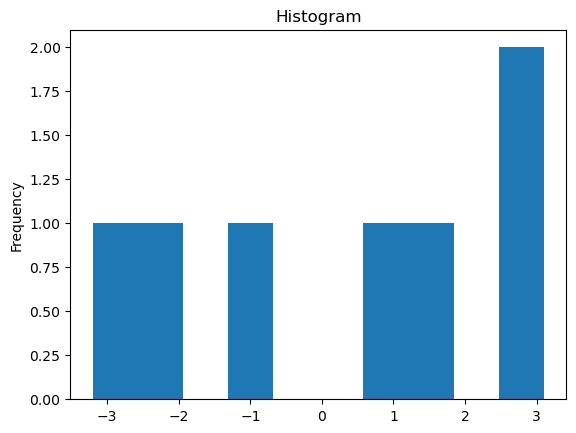

In [34]:
s3.plot(kind='hist', title = 'Histogram')

**(d)** Box plot

<AxesSubplot:title={'center':'Box plot'}>

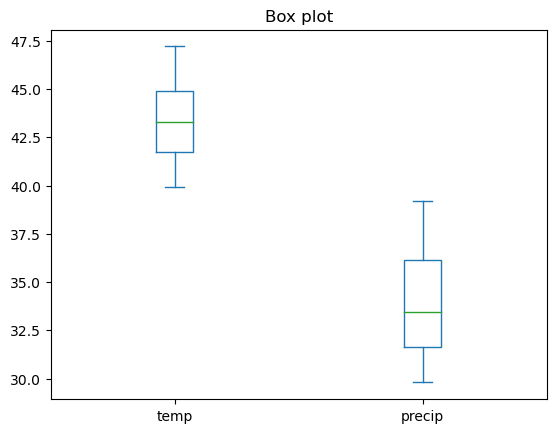

In [35]:
tuplelist = [(2011,45.1,32.4),(2012,42.4,34.5),(2013,47.2,39.2),
              (2014,44.2,31.4),(2015,39.9,29.8),(2016,41.5,36.7)]
columnNames = ['year','temp','precip']
weatherData = DataFrame(tuplelist, columns=columnNames)
weatherData[['temp','precip']].plot(kind='box', title='Box plot')

**(e)** Scatter plot 

weatherData =
    year  temp  precip
0  2011  45.1    32.4
1  2012  42.4    34.5
2  2013  47.2    39.2
3  2014  44.2    31.4
4  2015  39.9    29.8
5  2016  41.5    36.7


<AxesSubplot:xlabel='temp', ylabel='precip'>

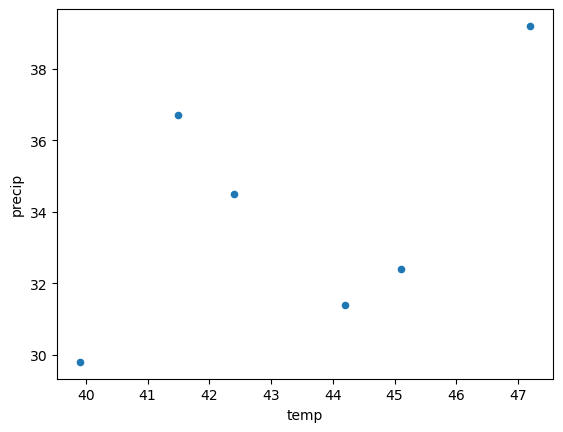

In [36]:
print('weatherData =\n', weatherData)

weatherData.plot(kind='scatter', x='temp', y='precip')